# Pokemon data analysis

data source: https://www.kaggle.com/datasets/abcsds/pokemon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set visualization style and colors
sns.set_style("whitegrid")
sns.set_palette(sns.dark_palette("#69d"))

# import data to pandas dataframe
pokemons = pd.read_csv("../input/pokemon/Pokemon.csv")

## Exploring data

In [2]:
pokemons.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Column description:
- '#': pokemon ID / Number in Pokedex
- 'Name': pokemon full name
- 'Type 1': pokemon type determines attack effectiveness to other types
- 'Type 2': some pokemons are dual-type
- 'HP': health points inform how many damge a pokemon can withstand befo
- 'Attact': strength of normal attack
- 'Defense': resistance against normal attacks
- 'Sp.Atk': strength of special attack
- 'Sp.Def': resistance against special attacks
- 'Speed': determines which pokemon attack first in duel

In [3]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


All numeric data has correct type.

Check for missiang data:

In [4]:
pokemons.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Not every pokemon is dual-type, in data set there is 386 pokemons without second type.  
For those pokemon "Type 2" we can set to "Type 1"

In [5]:
pokemons.loc[pokemons["Type 2"].isnull(), "Type 2"] = pokemons["Type 1"]

Let's check if all of 386 pokemons has the same "Type 1" and "Type 2"

In [6]:
pokemons.loc[pokemons["Type 1"] == pokemons["Type 2"]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Water,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Water,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,Dragon,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,Dragon,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,Ice,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,Ice,514,95,117,184,44,46,28,6,False


Check basic statistic in dataset

In [7]:
pokemons.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
pokemons

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In this description we can clearly see that we have 800 rows with pokemons, and only 721 individual pokemon ID. 
   
Some of pokemons can evolue to different variations of the same species - those pokemons has different names, but their indyvidual ID remain the same.    

According wikipedia in 1st generation there is 151 indyvidual species of pokemons. Let's check if dataset is correct:

In [9]:
unique_id = pokemons.loc[pokemons["Generation"] == 1]["#"].unique()
len(unique_id)

151

Dataset contains correct amount of indyvidual pokemons for 1st generation.  

Indyvidual pokemons in each generation:

In [10]:
pokemons.groupby("Generation")["#"].nunique()


Generation
1    151
2    100
3    135
4    107
5    156
6     72
Name: #, dtype: int64

## Data visualization

In [11]:
# custom color palette for pokemon types
type_palette = {
    'Grass': '#78C850',
    'Fire': "#F08030",
    'Water': "#6890F0",
    'Bug': "#A8B820",
    'Normal': "#A8A878",
    'Poison': "#A040A0",
    'Electric': "#F8D030",
    'Ground': "#E0C068",
    'Fairy': "#EE99AC",
    'Fighting': "#C03028",
    'Psychic': "#F85888",
    'Rock': "#B8A038",
    'Ghost': "#705898",
    'Ice': "#98D8D8",
    'Dragon': "#7038F8",
    'Dark': "#4C4C4C",
    'Steel': "#8D9296",
    'Flying': "#6BB3DB"
}

In [12]:
# New column "Total" with sum of all of numeric pokemon stats
pokemons["Total"] = pokemons.loc[:, ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].sum(axis=1)

### Number of pokemons in each generation

1gen: 166 pokemons
2gen: 106 pokemons
3gen: 160 pokemons
4gen: 121 pokemons
5gen: 165 pokemons
6gen: 82 pokemons


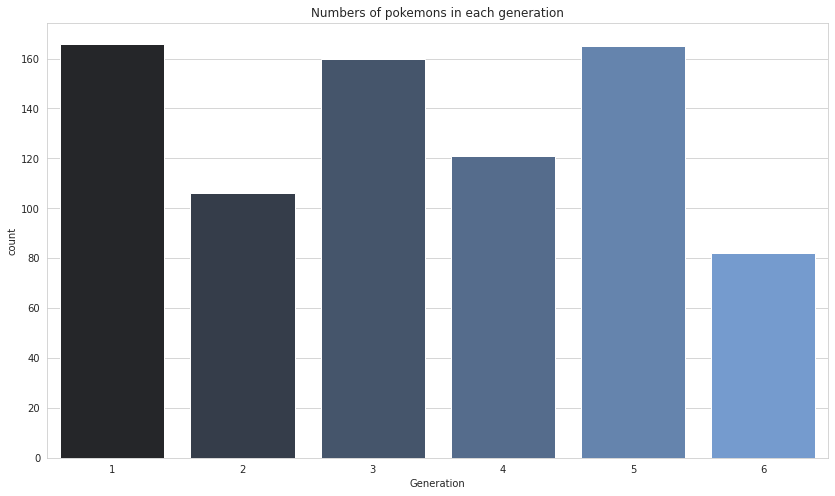

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(data=pokemons, x="Generation")
plt.title("Numbers of pokemons in each generation")

for i in set(pokemons["Generation"]):
    print(f"{i}gen: {pokemons[pokemons['Generation'] == i].shape[0]} pokemons")

plt.show()

### Number of pokemons based on Type 1

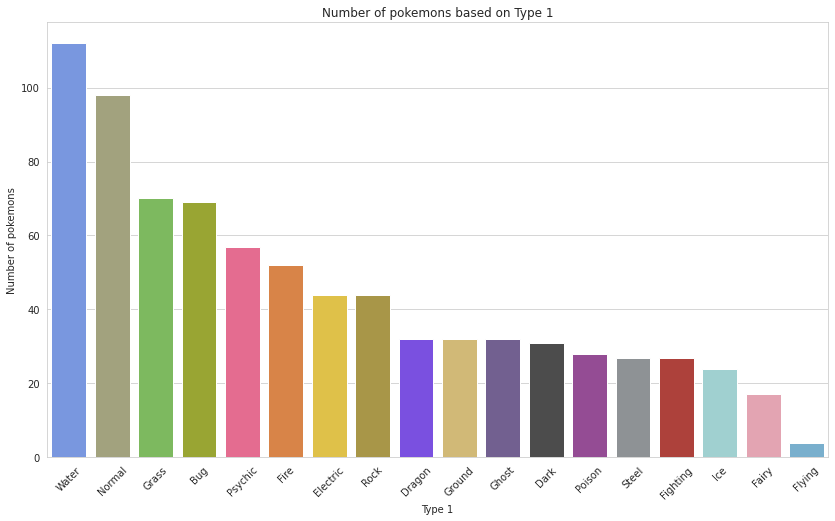

In [14]:
plt.figure(figsize=(14,8))
g = sns.countplot(data=pokemons, x=pokemons["Type 1"], order=pokemons["Type 1"].value_counts().index, palette=type_palette)

g.xaxis.set_tick_params(rotation=45)
plt.title("Number of pokemons based on Type 1")
plt.ylabel("Number of pokemons")
plt.xlabel("Type 1")

plt.show()

### Number of pokemons based on Type 2

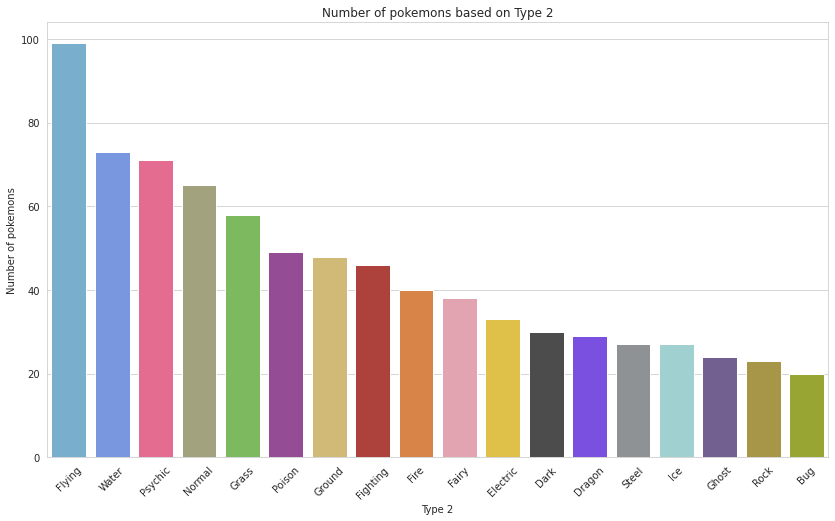

In [15]:
plt.figure(figsize=(14,8))
g = sns.countplot(data=pokemons, x=pokemons["Type 2"], order=pokemons["Type 2"].value_counts().index, palette=type_palette)

g.xaxis.set_tick_params(rotation=45)
plt.title("Number of pokemons based on Type 2")
plt.ylabel("Number of pokemons")
plt.xlabel("Type 2")

plt.show()

### Number of pokemons based on Type 1 and generation

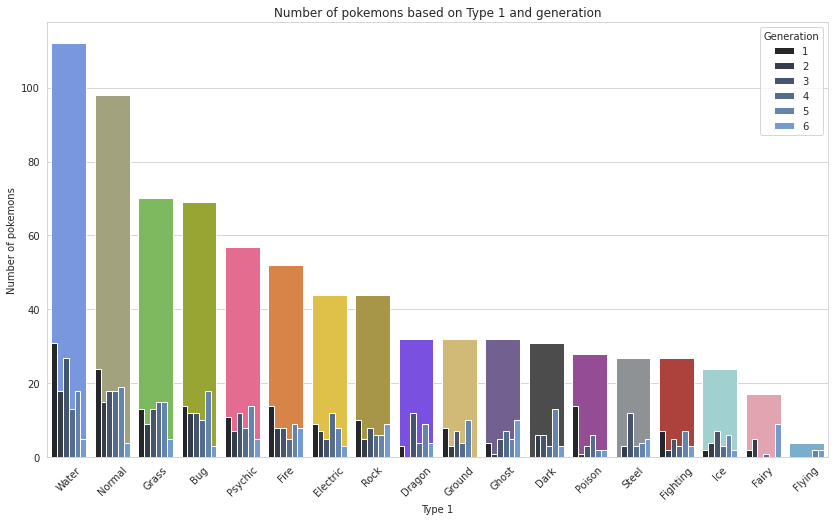

In [16]:
plt.figure(figsize=(14, 8))

g = sns.countplot(data=pokemons, x=pokemons["Type 1"], order=pokemons["Type 1"].value_counts().index, palette=type_palette)
sns.countplot(data=pokemons, x="Type 1", hue="Generation", order=pokemons["Type 1"].value_counts().index)

plt.title("Number of pokemons based on Type 1 and generation")
plt.ylabel("Number of pokemons")
plt.legend(loc='upper right', title="Generation")
g.xaxis.set_tick_params(rotation=45)

plt.show()

### Relation between pokemon total strength and Generation

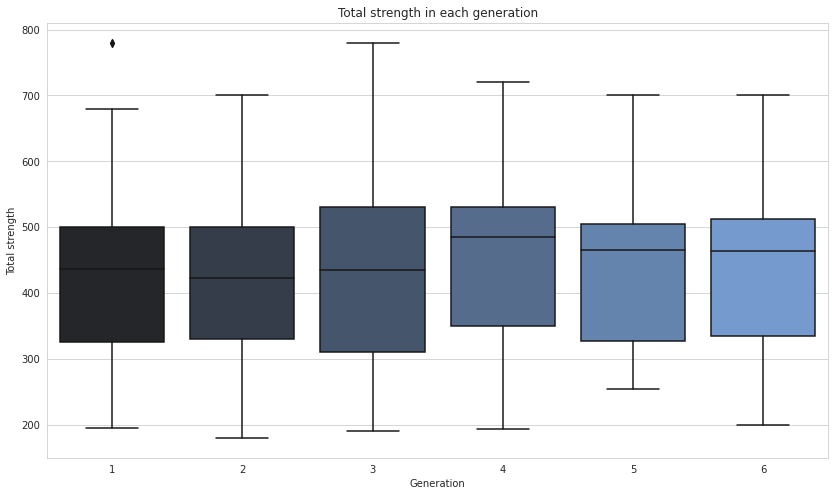

,Total,Generation
Total,1.000000,0.048384
Generation,0.048384,1.000000


In [17]:
plt.figure(figsize=(14,8))
sns.boxplot(data=pokemons, x="Generation", y="Total")

plt.title("Total strength in each generation")
plt.ylabel("Total strength")
plt.show()

pokemons[["Total", "Generation"]].corr()

There is no visible relation between pokemon generation and their strength. Correlation value is almost equal to zero.

### Total strength for different Type 1

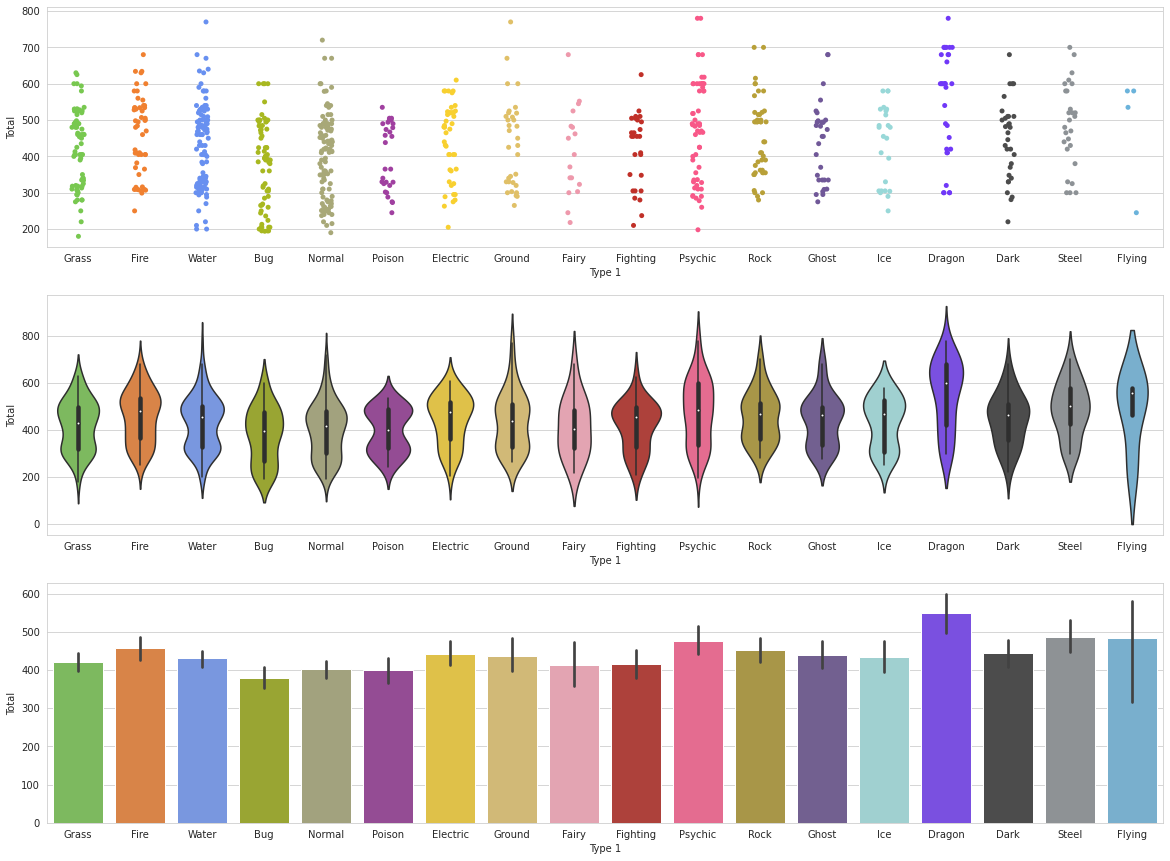

In [18]:
fig, ax = plt.subplots(3,1, figsize=(20,15))
sns.stripplot(data=pokemons, x="Type 1", y="Total", palette=type_palette, ax=ax[0])
sns.violinplot(data=pokemons, x="Type 1", y="Total", palette=type_palette, ax=ax[1])
sns.barplot(data=pokemons, x="Type 1", y="Total", palette=type_palette, ax=ax[2])

plt.show()

### Relation between pokemon total strength and legendary status

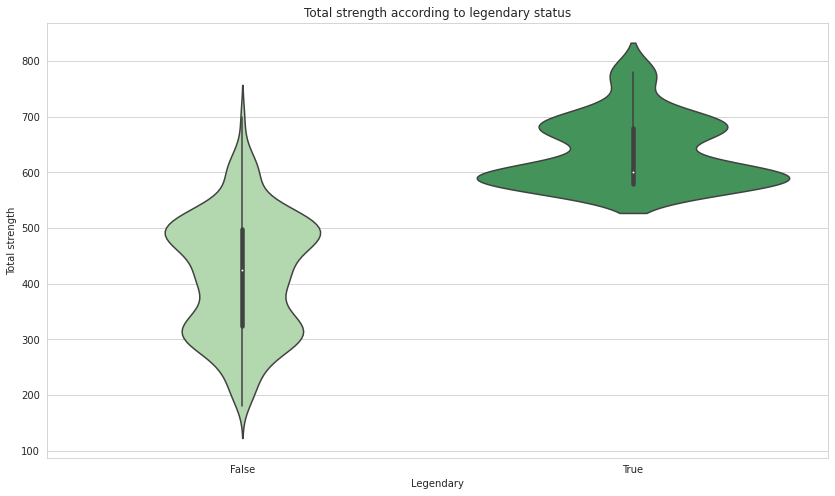

,Total,Legendary
Total,1.000000,0.501758
Legendary,0.501758,1.000000


In [19]:
plt.figure(figsize=(14,8))
sns.violinplot(data=pokemons, x="Legendary", y="Total", palette="Greens")

plt.title("Total strength according to legendary status")
plt.ylabel("Total strength")
plt.show()

pokemons[["Total", "Legendary"]].corr()

Positive linear correlation between pokemon total strength and their legendary status. Pokemons with legendary status are visibily stronger than regular pokemons

### Pokemons with regular and legendary status

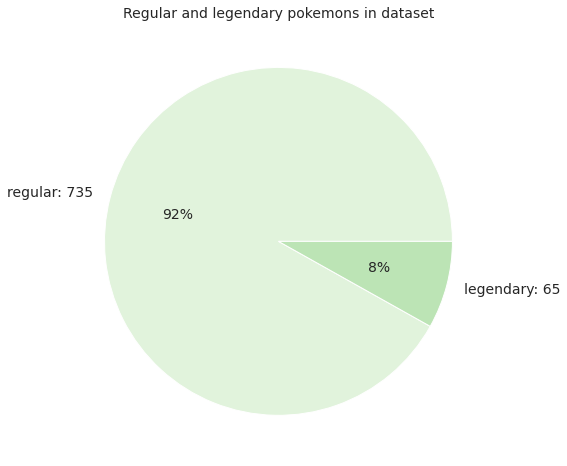

In [20]:
pokemons_status = pokemons.groupby("Legendary")["#"].count()

plt.figure(figsize=(8,8))
plt.pie(pokemons_status, labels=[f"regular: {pokemons_status[0]}", f"legendary: {pokemons_status[1]}"], colors=sns.color_palette("Greens"), autopct="%.0f%%", textprops={'fontsize': 14})
plt.title("Regular and legendary pokemons in dataset", fontsize=14)

plt.show()

92% of all pokemons are regular / standart pokemons. Only 8% pokemons in all 6 generations has legendary status. Those pokemon are extremely rare to find and often very powerfull as shown on previous violinplot

#### Pokemon types with regular status

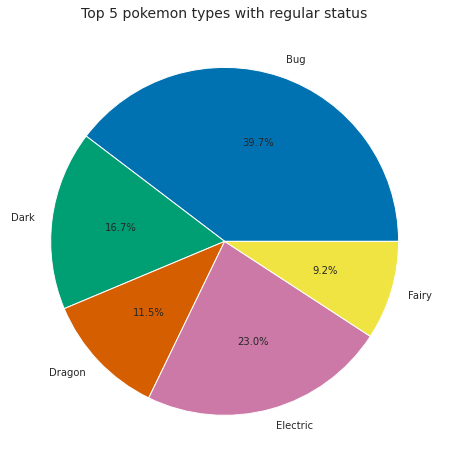

In [21]:
regular_pokemons = pokemons[pokemons["Legendary"] == False].groupby("Type 1")["#"].count()
regular_pokemons = regular_pokemons.iloc[:5]

plt.style.use('seaborn-colorblind')

plt.figure(figsize=(8,8))
plt.pie(regular_pokemons, labels=regular_pokemons.index, autopct="%.01f%%")
plt.title("Top 5 pokemon types with regular status", fontsize=14)

plt.show()

#### Pokemon types with legendary status

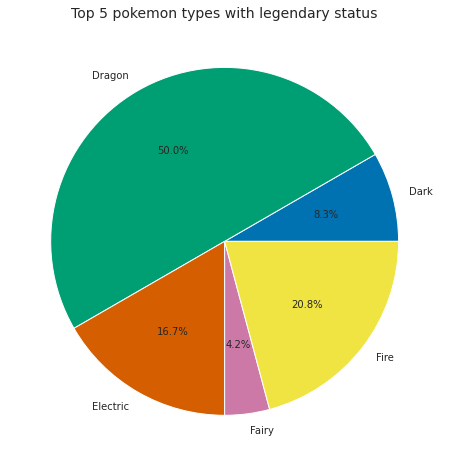

In [22]:
legendary_pokemons = pokemons[pokemons["Legendary"] == True].groupby("Type 1")["#"].count()
legendary_pokemons = legendary_pokemons.iloc[:5]

plt.figure(figsize=(8,8))
plt.pie(legendary_pokemons, labels=legendary_pokemons.index, autopct="%.01f%%")
plt.title("Top 5 pokemon types with legendary status", fontsize=14)

plt.show()

### Linear correlation between pokemons numeric stats

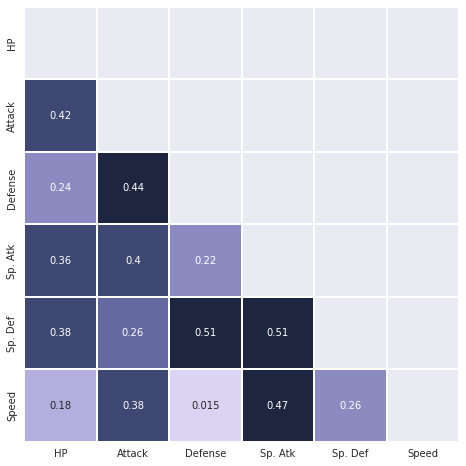

In [23]:
pokemons_corr = pokemons[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].corr()
mask = np.triu(pokemons_corr.corr())

plt.figure(figsize = (8,8))
sns.set_style("darkgrid")
sns.heatmap(pokemons_corr, annot=True, linewidths=2, square=True, mask=mask, cbar=False, cmap=sns.cubehelix_palette(start=2.8, rot=.1))

plt.show()

For all pokemon stats there is positive linear correlation. That mean with increasing one value another also increasing. Highest correlcation can be observed for relation: special defence / special attack and special defence / standart defence

### Numeric pokemon stats density distribution 

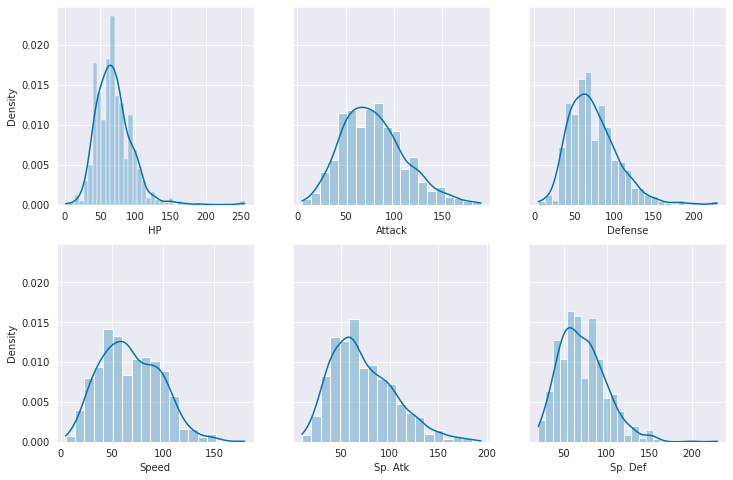

In [24]:
fig, ax = plt.subplots(2,3, figsize=(12,8), sharey=True)
sns.histplot(pokemons["HP"], ax=ax[0,0], stat="density", kde=True, alpha=0.3)
sns.histplot(pokemons["Attack"], ax=ax[0,1], stat="density", kde=True, alpha=0.3)
sns.histplot(pokemons["Defense"], ax=ax[0,2], stat="density", kde=True, alpha=0.3)
sns.histplot(pokemons["Sp. Atk"], ax=ax[1,1], stat="density", kde=True, alpha=0.3)
sns.histplot(pokemons["Sp. Def"], ax=ax[1,2], stat="density", kde=True, alpha=0.3)
sns.histplot(pokemons["Speed"], ax=ax[1,0], stat="density", kde=True, alpha=0.3)

plt.show()

#### Check for normal distribution with Shapiro-Wilk test for normality

In [25]:
def check_normal_distribution(df, columns):
    for column in columns:
        s, p = shapiro(pokemons[columns])

        if p < 0.05:
            print(f"{column}: Lack of normal distribution")
        else:
            print(f"{column}: Normal distribution")

In [26]:
from scipy.stats import shapiro

test_columns = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

check_normal_distribution(pokemons, test_columns)

HP: Lack of normal distribution
Attack: Lack of normal distribution
Defense: Lack of normal distribution
Sp. Atk: Lack of normal distribution
Sp. Def: Lack of normal distribution
Speed: Lack of normal distribution


Perform test again for normalized data

In [27]:
poke_norm = pokemons.copy()

# normalize data in test_columns
poke_norm[test_columns] = poke_norm[test_columns] / poke_norm[test_columns].abs().max()

check_normal_distribution(poke_norm, test_columns)


HP: Lack of normal distribution
Attack: Lack of normal distribution
Defense: Lack of normal distribution
Sp. Atk: Lack of normal distribution
Sp. Def: Lack of normal distribution
Speed: Lack of normal distribution


P-Value is less than .05 for all test, we reject the null hypothesis. None of the pokemon stats come from a normal distribution